Difference Between CNNs and Pre-trained Models
1. CNNs (Convolutional Neural Networks):
Definition:
A type of neural network specifically designed to process grid-like data such as images. It is built from scratch using components like convolutional layers, pooling layers, and fully connected layers for classification.
Advantages:
Highly flexible for designing custom architectures tailored to specific datasets.
Useful for understanding the impact of architectural modifications on model performance.
Challenges:
Requires training from scratch, which demands large datasets and significant computational resources.
2. Pre-trained Models:
Definition:
Models that have been trained on large datasets (e.g., ImageNet) and come with pre-learned weights that can be reused for similar tasks.
Advantages:
Reduces the need for large amounts of data.
Provides a quick way to achieve high performance without training a model from scratch.
Challenges:
May not perform optimally if the new task is very different from the original task the model was trained on.

Key Difference:

Custom CNNs: Built and trained from scratch, offering complete flexibility but requiring substantial resources.

Pre-trained Models: Start with pre-learned weights, saving time and computational effort, and can be fine-tuned for the specific task.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


So lets try to read some data and start with **CNN**

# Split data in drive into Train,Test and Validation

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_data(data_dir, output_dir, train_ratio=0.7, val_ratio=0.25, test_ratio=0.05):
    """
    Split data into train, validation, and test directories.

    Parameters:
        data_dir (str): Path to the dataset directory.
        output_dir (str): Path to save the split dataset.
        train_ratio (float): Ratio of training data (default is 0.7).
        val_ratio (float): Ratio of validation data (default is 0.2).
        test_ratio (float): Ratio of test data (default is 0.1).
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    classes = os.listdir(data_dir)
    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Get all files in the class directory
        files = os.listdir(class_dir)
        train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

        # Define output subdirectories
        train_dir = os.path.join(output_dir, 'train', class_name)
        val_dir = os.path.join(output_dir, 'val', class_name)
        test_dir = os.path.join(output_dir, 'test', class_name)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        # Move files to respective directories
        for file in train_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(train_dir, file))
        for file in val_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(val_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(test_dir, file))

    print("Data split completed!")




In [ ]:
'''
data_dir = '/content/drive/MyDrive/Flowers/train'  # Path to your dataset
output_dir = '/content/drive/MyDrive/Flowers_Divided'  # Path to save split data
split_data(data_dir, output_dir)'''

"\ndata_dir = '/content/drive/MyDrive/Flowers/train'  # Path to your dataset\noutput_dir = '/content/drive/MyDrive/Flowers_Divided'  # Path to save split data\nsplit_data(data_dir, output_dir)"

In [ ]:
import os

def dataset_info(data_dir):
    """
    Display information about the dataset: folder structure and number of images per class.
    This function will now be applied to the train, validation, and test directories.

    Parameters:
        data_dir (str): Path to the dataset directory (train, val, or test).
    """
    total_images = 0
    class_counts = {}

    # Traverse dataset directory (train, val, or test)
    for class_name in sorted(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue  # Skip non-directory files

        # Count images in the current class folder
        num_images = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])
        class_counts[class_name] = num_images
        total_images += num_images

    # Print results
    print(f"Dataset Directory: {data_dir}")
    print(f"Total Classes: {len(class_counts)}")
    print(f"Total Images: {total_images}\n")

    print("Images per Class:")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} images")

# Example usage
train_dir = '/content/drive/MyDrive/divided_mask_dataset/train'  # Path to your train data
val_dir = '/content/drive/My Drive/divided_mask_dataset/val'      # Path to your validation data
test_dir = '/content/drive/My Drive/divided_mask_dataset/test'    # Path to your test data

print("Train Dataset Info:")
dataset_info(train_dir)

print("\nValidation Dataset Info:")
dataset_info(val_dir)

print("\nTest Dataset Info:")
dataset_info(test_dir)


Train Dataset Info:
Dataset Directory: /content/drive/MyDrive/divided_mask_dataset/train
Total Classes: 2
Total Images: 962

Images per Class:
  with mask: 482 images
  without mask: 480 images

Validation Dataset Info:
Dataset Directory: /content/drive/My Drive/divided_mask_dataset/val
Total Classes: 2
Total Images: 275

Images per Class:
  with mask: 138 images
  without mask: 137 images

Test Dataset Info:
Dataset Directory: /content/drive/My Drive/divided_mask_dataset/test
Total Classes: 2
Total Images: 139

Images per Class:
  with mask: 70 images
  without mask: 69 images


plot some images

Random Images from Train Dataset:


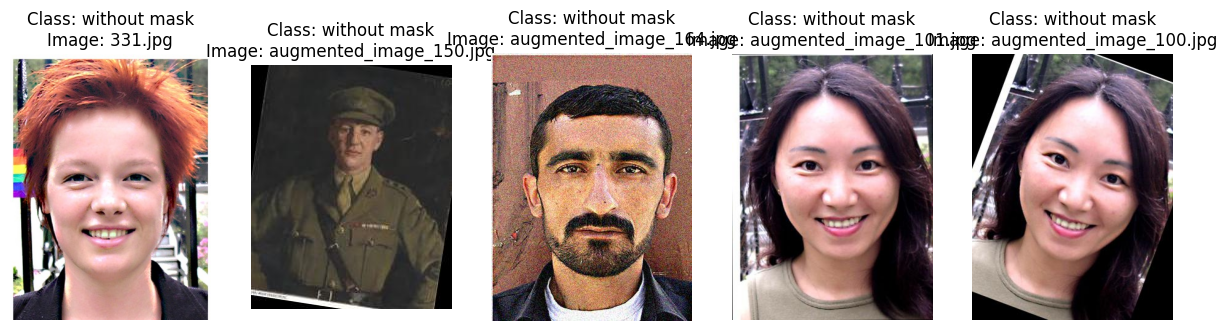

Random Images from Validation Dataset:


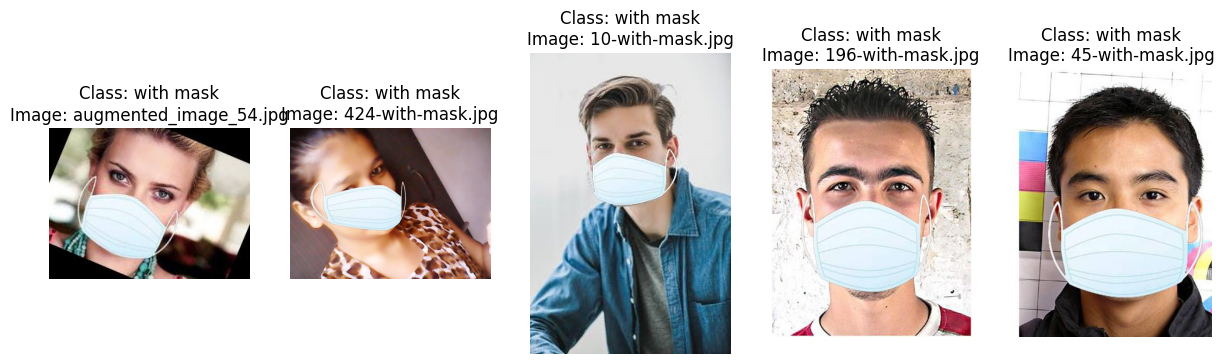

Random Images from Test Dataset:


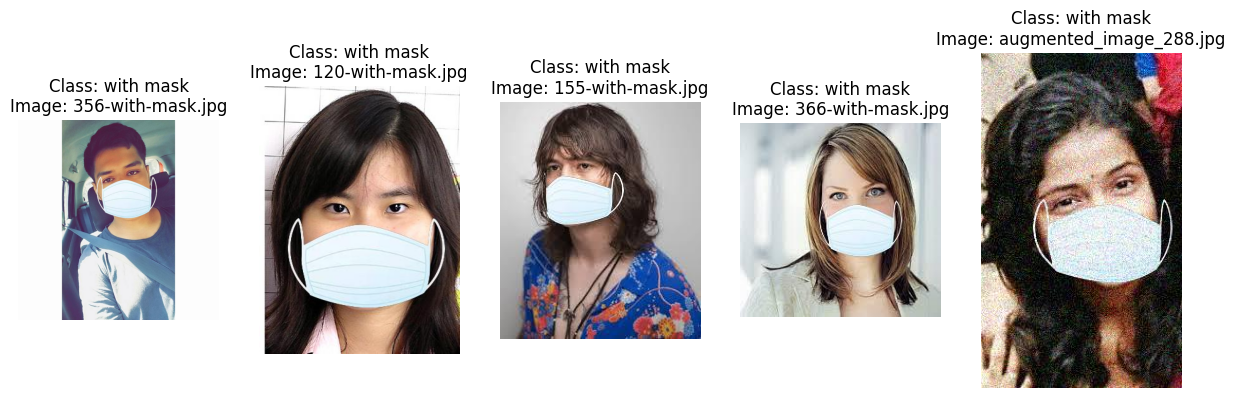

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_random_images(data_dir, num_images=5):
    """
    Plot random images from the specified dataset directory.

    Parameters:
        data_dir (str): Path to the dataset directory (train, val, or test).
        num_images (int): Number of random images to display.
    """
    class_names = sorted(os.listdir(data_dir))
    class_name = random.choice(class_names)  # Choose a random class to display images
    class_dir = os.path.join(data_dir, class_name)

    # Get all image file names in the chosen class folder
    image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # Choose random images to display
    selected_images = random.sample(image_files, num_images)

    # Plot the selected images
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(class_dir, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(f"Class: {class_name}\nImage: {img_file}")

    plt.show()


print("Random Images from Train Dataset:")
plot_random_images(train_dir)

print("Random Images from Validation Dataset:")
plot_random_images(val_dir)

print("Random Images from Test Dataset:")
plot_random_images(test_dir)


Create ImageDataGenerators for train, validation, and test sets
note : Val and test have no augmentation





In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target size for the CNN model
target_size = (224, 224)  # Target size for models like MobileNetV2

# Define the batch size
batch_size = 32

# Create ImageDataGenerators for train, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Optional: Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation/test

# Create generators to load and resize images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 962 images belonging to 2 classes.
Found 275 images belonging to 2 classes.
Found 139 images belonging to 2 classes.


# Build the CNN

In [ ]:
# Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/divided_mask_dataset/best_advanced_model.keras', monitor='val_loss', save_best_only=True, verbose=1)




In [ ]:
# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.5332 - loss: 3.6778
Epoch 1: val_loss improved from inf to 0.64849, saving model to /content/drive/MyDrive/divided_mask_dataset/best_advanced_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 638ms/step - accuracy: 0.5326 - loss: 3.6211 - val_accuracy: 0.5469 - val_loss: 0.6485
Epoch 2/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5312 - loss: 0.6448

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.64849
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5312 - loss: 0.6448 - val_accuracy: 0.0000e+00 - val_loss: 0.9708
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7363 - loss: 0.5029
Epoch 3: val_loss improved from 0.64849 to 0.40754, saving model to /content/drive/MyDrive/divided_mask_dataset/best_advanced_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 545ms/step - accuracy: 0.7380 - loss: 0.5018 - val_accuracy: 0.8125 - val_loss: 0.4075
Epoch 4/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8438 - loss: 0.2785
Epoch 4: val_loss did not improve from 0.40754
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8438 - loss: 0.2785 - val_accuracy: 0.7368 - val_loss: 0.7172
Epoch 5/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.8509 - loss: 0.3546
Epoch 5: val_loss improved from 0.40754 to 0.17103, saving model to /content/drive/MyDrive/divided_mask_dataset/best_advanced_model.keras
30/30 ━━━━━━━━━━━━

## Evaluate

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.9885 - loss: 0.0422
Test Loss: 0.07171785086393356
Test Accuracy: 0.9765625


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 778ms/step


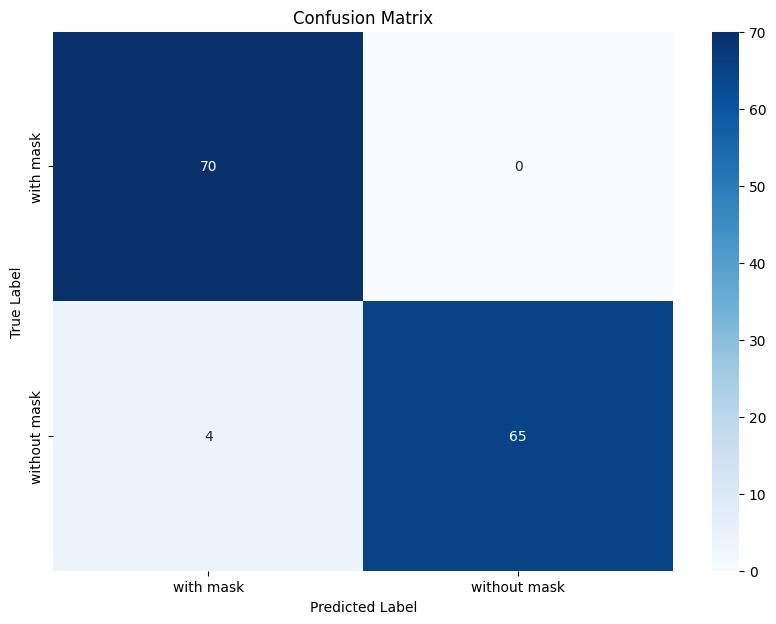

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Generate predictions for the test data without specifying 'steps'
test_predictions = model.predict(test_generator, verbose=1)

# Get the predicted class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true class labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

i expected complexed data than what i see but lets try

another confused data to see how CNN dealing with

Confused classes




# Try confused data

Flowers data may be difficult for Simple CNN to Classifing

In [ ]:
import os

def dataset_info(data_dir):
    """
    Display information about the dataset: folder structure and number of images per class.
    This function will now be applied to the train, validation, and test directories.

    Parameters:
        data_dir (str): Path to the dataset directory (train, val, or test).
    """
    total_images = 0
    class_counts = {}

    # Traverse dataset directory (train, val, or test)
    for class_name in sorted(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue  # Skip non-directory files

        # Count images in the current class folder
        num_images = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])
        class_counts[class_name] = num_images
        total_images += num_images

    # Print results
    print(f"Dataset Directory: {data_dir}")
    print(f"Total Classes: {len(class_counts)}")
    print(f"Total Images: {total_images}\n")

    print("Images per Class:")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} images")

# Example usage
train_dir = '/content/drive/MyDrive/Flowers_Divided/train'  # Path to your train data
val_dir = '/content/drive/MyDrive/Flowers_Divided/val'      # Path to your validation data
test_dir = '/content/drive/MyDrive/Flowers_Divided/test'    # Path to your test data

print("Train Dataset Info:")
dataset_info(train_dir)

print("\nValidation Dataset Info:")
dataset_info(val_dir)

print("\nTest Dataset Info:")
dataset_info(test_dir)


Train Dataset Info:
Dataset Directory: /content/drive/MyDrive/Flowers_Divided/train
Total Classes: 5
Total Images: 1919

Images per Class:
  daisy: 350 images
  dandelion: 452 images
  rose: 347 images
  sunflower: 346 images
  tulip: 424 images

Validation Dataset Info:
Dataset Directory: /content/drive/MyDrive/Flowers_Divided/val
Total Classes: 5
Total Images: 686

Images per Class:
  daisy: 125 images
  dandelion: 161 images
  rose: 124 images
  sunflower: 124 images
  tulip: 152 images

Test Dataset Info:
Dataset Directory: /content/drive/MyDrive/Flowers_Divided/test
Total Classes: 5
Total Images: 141

Images per Class:
  daisy: 26 images
  dandelion: 33 images
  rose: 26 images
  sunflower: 25 images
  tulip: 31 images


Random Images from Train Dataset:


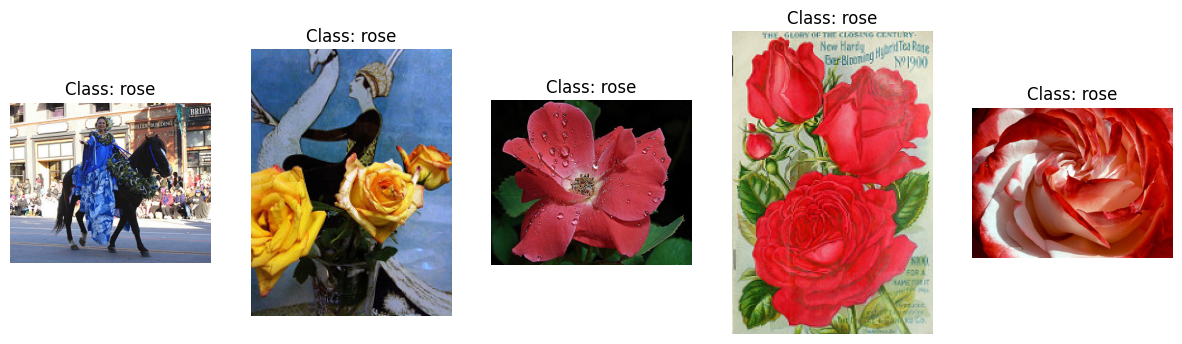

Random Images from Validation Dataset:


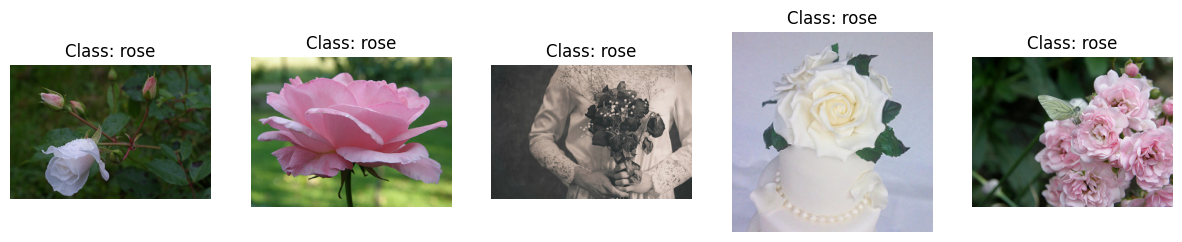

Random Images from Test Dataset:


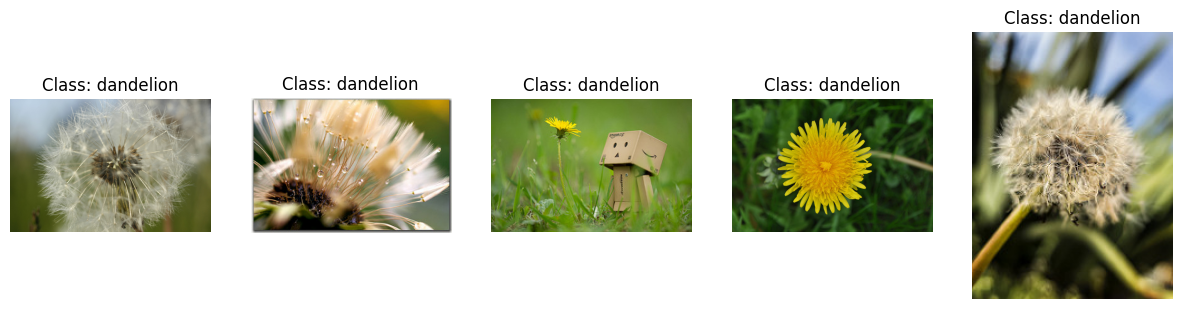

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_random_images(data_dir, num_images=5):
    """
    Plot random images from the specified dataset directory.

    Parameters:
        data_dir (str): Path to the dataset directory (train, val, or test).
        num_images (int): Number of random images to display.
    """
    class_names = sorted(os.listdir(data_dir))
    class_name = random.choice(class_names)  # Choose a random class to display images
    class_dir = os.path.join(data_dir, class_name)

    # Get all image file names in the chosen class folder
    image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # Choose random images to display
    selected_images = random.sample(image_files, num_images)

    # Plot the selected images
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(class_dir, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(f"Class: {class_name}")

    plt.show()


print("Random Images from Train Dataset:")
plot_random_images(train_dir)

print("Random Images from Validation Dataset:")
plot_random_images(val_dir)

print("Random Images from Test Dataset:")
plot_random_images(test_dir)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target size for the CNN model
target_size = (224, 224)  # Target size for models like MobileNetV2

# Define the batch size
batch_size = 32

# Create ImageDataGenerators for train, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Optional: Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation/test

# Create generators to load and resize images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification (CIFAR-10)
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 1919 images belonging to 5 classes.
Found 686 images belonging to 5 classes.
Found 141 images belonging to 5 classes.


In [ ]:
# Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/divided_mask_dataset/best_advanced_model.keras', monitor='val_loss', save_best_only=True, verbose=1)




In [ ]:
# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.2674 - loss: 4.8076
Epoch 1: val_loss improved from inf to 1.26450, saving model to /content/drive/MyDrive/divided_mask_dataset/best_advanced_model.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 64s 893ms/step - accuracy: 0.2685 - loss: 4.7680 - val_accuracy: 0.4628 - val_loss: 1.2645
Epoch 2/50
 1/59 ━━━━━━━━━━━━━━━━━━━━ 4:07 4s/step - accuracy: 0.5806 - loss: 1.2086

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.26450 to 0.97379, saving model to /content/drive/MyDrive/divided_mask_dataset/best_advanced_model.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 28s 405ms/step - accuracy: 0.5806 - loss: 1.2086 - val_accuracy: 0.3571 - val_loss: 0.9738
Epoch 3/50
58/59 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.4667 - loss: 1.2440
Epoch 3: val_loss did not improve from 0.97379
59/59 ━━━━━━━━━━━━━━━━━━━━ 87s 549ms/step - accuracy: 0.4665 - loss: 1.2448 - val_accuracy: 0.5536 - val_loss: 1.1431
Epoch 4/50
 1/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5625 - loss: 0.9831
Epoch 4: val_loss did not improve from 0.97379
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5625 - loss: 0.9831 - val_accuracy: 0.4286 - val_loss: 1.1856
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.5264 - loss: 1.1673
Epoch 5: val_loss did not improve from 0.97379
59/59 ━━━━━━━━━━━━━━━━━━━━ 36s 545ms/step - accuracy: 0.5268 - loss: 1.1669 - val_accuracy: 0.5759 - val_loss:

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.3146 - loss: 1.4061
Test Loss: 1.2935124635696411
Test Accuracy: 0.40625


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step


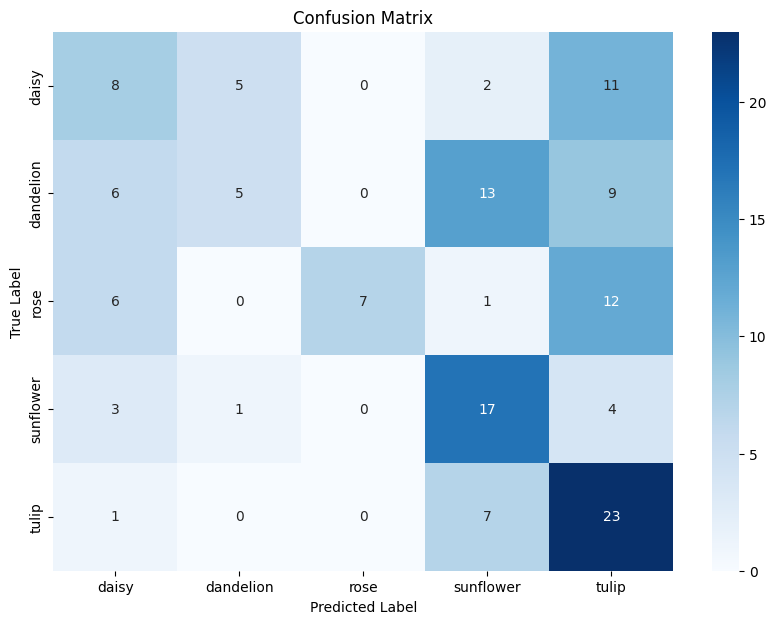

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Generate predictions for the test data without specifying 'steps'
test_predictions = model.predict(test_generator, verbose=1)

# Get the predicted class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true class labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

As expected it was so hard to know from the first time

so i will not waste time in tring find the best CNN model

but i will try **Pretrained models**

## Pre-Trained MobileNetV2

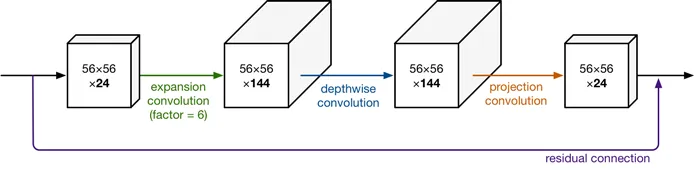

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Define the number of classes in your dataset
num_classes = 5

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent them from being trained
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensions to prevent overfitting
x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(128, activation='relu')(x)  # Add a fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
output = Dense(num_classes, activation='softmax')(x)  # Final classification layer

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/drive/MyDrive/Flowers_Divided/train'  # Path to your train data
val_dir = '/content/drive/MyDrive/Flowers_Divided/val'      # Path to your validation data

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')



Found 1919 images belonging to 5 classes.
Found 686 images belonging to 5 classes.


In [ ]:

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 57s 730ms/step - accuracy: 0.5499 - loss: 1.1626 - val_accuracy: 0.8397 - val_loss: 0.4573
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 523ms/step - accuracy: 0.7890 - loss: 0.5565 - val_accuracy: 0.8703 - val_loss: 0.3778
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 531ms/step - accuracy: 0.8240 - loss: 0.4652 - val_accuracy: 0.8557 - val_loss: 0.3841
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 512ms/step - accuracy: 0.8439 - loss: 0.3984 - val_accuracy: 0.8907 - val_loss: 0.3281
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 521ms/step - accuracy: 0.8489 - loss: 0.4177 - val_accuracy: 0.8717 - val_loss: 0.3581
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 536ms/step - accuracy: 0.8642 - loss: 0.3809 - val_accuracy: 0.8950 - val_loss: 0.3194
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 528ms/step - accuracy: 0.8739 - loss: 0.3457 - val_accuracy: 0.8950 - val_loss: 0.3073
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 515ms/step - accuracy: 0.8950 - loss: 0.2812 - val_accuracy: 0.896

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.8615 - loss: 0.4090
Test Loss: 0.44765931367874146
Test Accuracy: 0.8515625


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


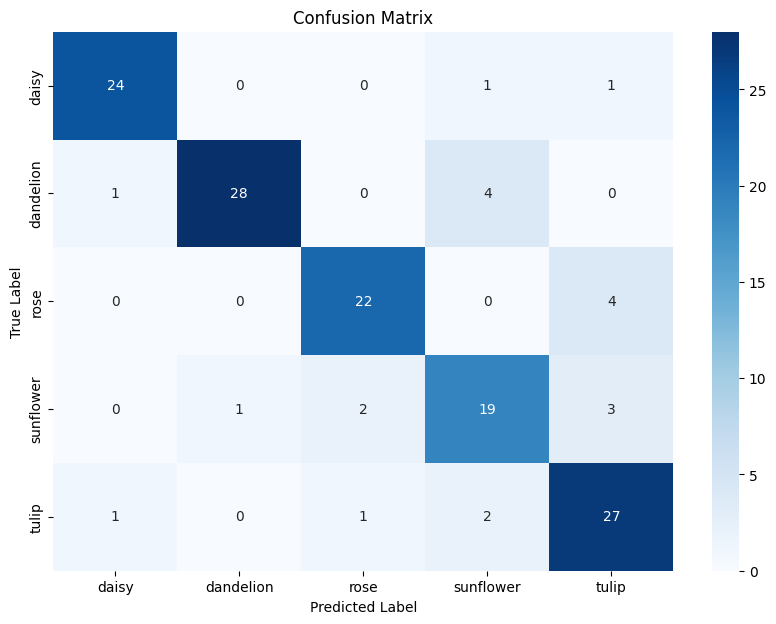

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Generate predictions for the test data without specifying 'steps'
test_predictions = model.predict(test_generator, verbose=1)

# Get the predicted class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true class labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Nice one




In [ ]:
model.save("/content/drive/MyDrive/Flowers_Divided/MobileNetV2.keras")

## fine-tune the MobileNetV2 model



**Steps for Fine-tuning MobileNetV2**
Train the Custom Head: Initially, freeze the base model
and train only the custom head (already done in the previous step).

Unfreeze Layers: Unfreeze some of the deeper layers of the base model while keeping the earlier layers frozen (to preserve general features).

Lower Learning Rate: Use a smaller learning rate for fine-tuning to avoid destroying the pre-trained weights.


Re-train the Model: Train the model with the updated trainable layers.

In [ ]:
# Unfreeze some layers of the base model
base_model.trainable = True  # Unfreeze the entire model for fine-tuning (optional: unfreeze specific layers)

# Optionally, unfreeze specific layers (e.g., last 20 layers)
for layer in base_model.layers[:-20]:  # Freeze all layers except the last 20
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 1,370,693 (5.23 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [ ]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")


Layer 0: input_layer_1, Trainable: False
Layer 1: Conv1, Trainable: False
Layer 2: bn_Conv1, Trainable: False
Layer 3: Conv1_relu, Trainable: False
Layer 4: expanded_conv_depthwise, Trainable: False
Layer 5: expanded_conv_depthwise_BN, Trainable: False
Layer 6: expanded_conv_depthwise_relu, Trainable: False
Layer 7: expanded_conv_project, Trainable: False
Layer 8: expanded_conv_project_BN, Trainable: False
Layer 9: block_1_expand, Trainable: False
Layer 10: block_1_expand_BN, Trainable: False
Layer 11: block_1_expand_relu, Trainable: False
Layer 12: block_1_pad, Trainable: False
Layer 13: block_1_depthwise, Trainable: False
Layer 14: block_1_depthwise_BN, Trainable: False
Layer 15: block_1_depthwise_relu, Trainable: False
Layer 16: block_1_project, Trainable: False
Layer 17: block_1_project_BN, Trainable: False
Layer 18: block_2_expand, Trainable: False
Layer 19: block_2_expand_BN, Trainable: False
Layer 20: block_2_expand_relu, Trainable: False
Layer 21: block_2_depthwise, Trainable: 

In [ ]:
# Re-train the model
history_fine_tune = model.fit(train_generator,
                              epochs=10,  # Add more epochs for fine-tuning
                              validation_data=val_generator)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 65s 791ms/step - accuracy: 0.8386 - loss: 0.4489 - val_accuracy: 0.8586 - val_loss: 0.4909
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 534ms/step - accuracy: 0.9119 - loss: 0.2598 - val_accuracy: 0.8892 - val_loss: 0.3831
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 541ms/step - accuracy: 0.9332 - loss: 0.2067 - val_accuracy: 0.8834 - val_loss: 0.4602
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 542ms/step - accuracy: 0.9444 - loss: 0.1809 - val_accuracy: 0.8761 - val_loss: 0.4500
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 560ms/step - accuracy: 0.9521 - loss: 0.1361 - val_accuracy: 0.8717 - val_loss: 0.4385
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 572ms/step - accuracy: 0.9581 - loss: 0.1139 - val_accuracy: 0.8732 - val_loss: 0.5043
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.9586 - loss: 0.1278 - val_accuracy: 0.8732 - val_loss: 0.5187
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 566ms/step - accuracy: 0.9682 - loss: 0.1029 - val_accu

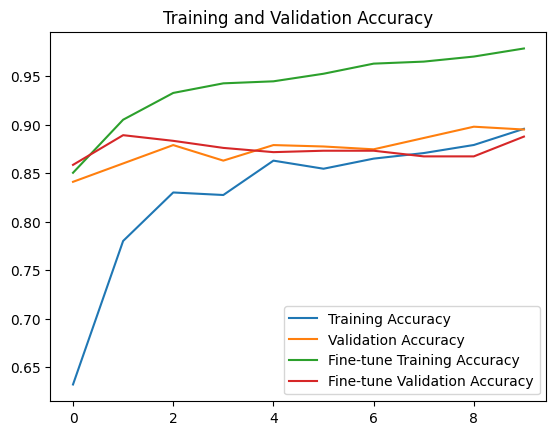

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tune Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-tune Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.8521 - loss: 0.5830
Test Loss: 0.7566991448402405
Test Accuracy: 0.8125


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 785ms/step


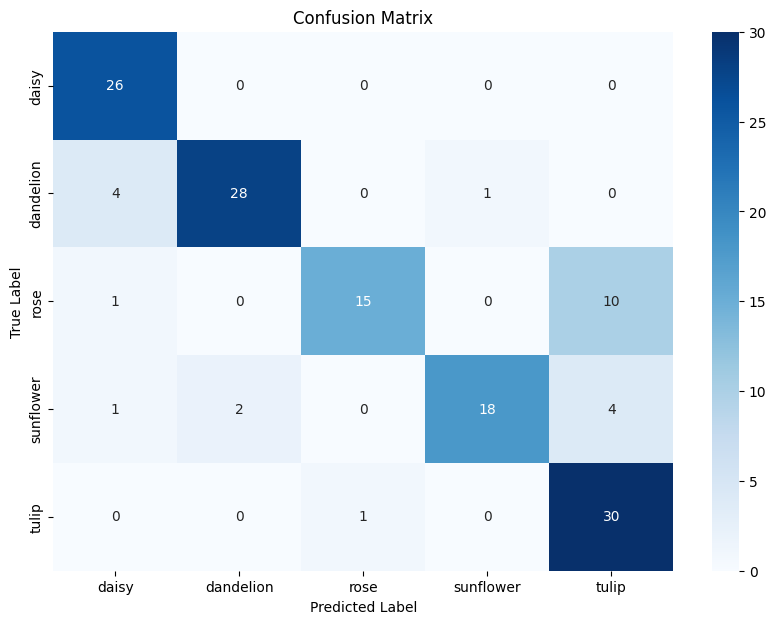

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Generate predictions for the test data without specifying 'steps'
test_predictions = model.predict(test_generator, verbose=1)

# Get the predicted class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true class labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Flowers_Divided/MobileNetV2_fine_tune.keras")

## Pre-trained ResNet50

In [ ]:
train_dir = '/content/drive/MyDrive/Flowers_Divided/train'  # Path to your train data
val_dir = '/content/drive/MyDrive/Flowers_Divided/val'      # Path to your validation data
test_dir = '/content/drive/MyDrive/Flowers_Divided/test'

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
# Data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=resnet_preprocess,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 1919 images belonging to 5 classes.
Found 686 images belonging to 5 classes.


In [ ]:
# Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Train

In [ ]:
# Train
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

LEARNING_RATE = 1e-4
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/flower_data/ResNet50.keras',             # Filepath to save the model
    monitor='val_accuracy',      # Metric to monitor (e.g., validation accuracy)
    save_best_only=True,         # Save only the best model
    mode='max',                  # Maximize the monitored metric (e.g., accuracy)
    verbose=1                    # Print a message when saving the model
)
history = model.fit(train_generator, validation_data=val_generator, epochs=25,callbacks=[early_stopping, reduce_lr,checkpoint])

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.8191 - loss: 0.5075
Epoch 1: val_accuracy improved from -inf to 0.86880, saving model to /content/drive/MyDrive/flower_data/ResNet50.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 45s 702ms/step - accuracy: 0.8193 - loss: 0.5071 - val_accuracy: 0.8688 - val_loss: 0.4113 - learning_rate: 1.0000e-04
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.8240 - loss: 0.4618
Epoch 2: val_accuracy did not improve from 0.86880
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 684ms/step - accuracy: 0.8242 - loss: 0.4613 - val_accuracy: 0.8659 - val_loss: 0.3927 - learning_rate: 1.0000e-04
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.8673 - loss: 0.3743
Epoch 3: val_accuracy did not improve from 0.86880
60/60 ━━━━━━━━━━━━━━━━━━━━ 83s 696ms/step - accuracy: 0.8673 - loss: 0.3744 - val_accuracy: 0.8601 - val_loss: 0.3866 - learning_rate: 1.0000e-04
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.8929 - loss: 0.33

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=resnet_preprocess)  # Replace with your model's preprocessing

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to your test data
    target_size=(224, 224),  # Same as training
    batch_size=32,  # Adjust as needed
    class_mode='categorical',  # Same as training
    shuffle=False  # Do not shuffle for evaluation
)

Found 141 images belonging to 5 classes.


In [ ]:
# Evaluate the model
results = model.evaluate(test_generator)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.9525 - loss: 0.1839
Test Loss: 0.264686644077301
Test Accuracy: 0.9290780425071716


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step


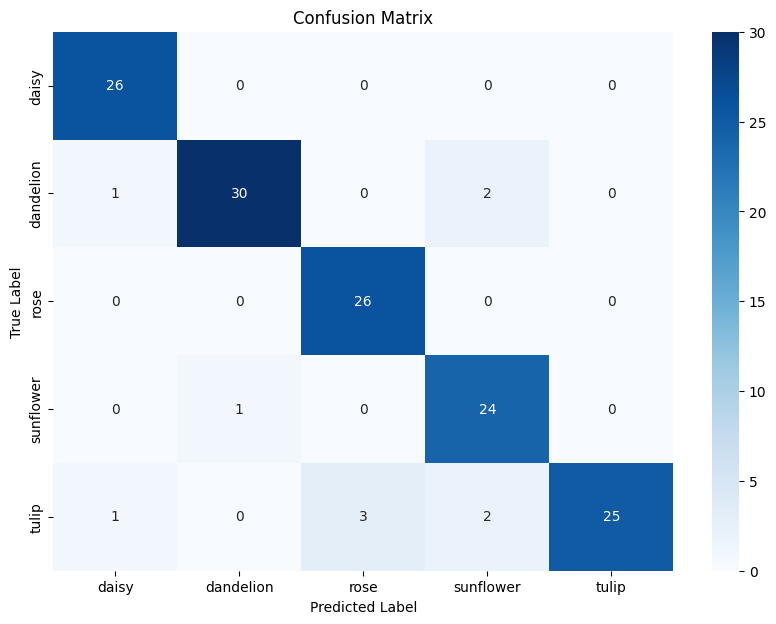

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Generate predictions for the test data without specifying 'steps'
test_predictions = model.predict(test_generator, verbose=1)

# Get the predicted class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true class labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Comparison of Pre-trained Models
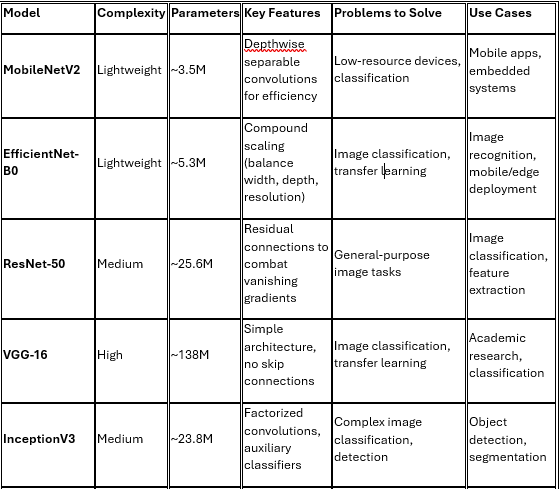
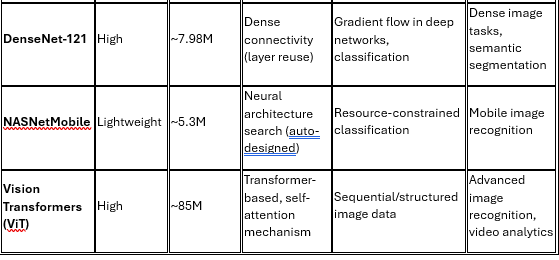

**Detailed Analysis**
1. Complexity
MobileNetV2 and EfficientNet-B0 are lightweight, making them suitable for resource-constrained devices like mobile phones or embedded systems.

ResNet-50 and InceptionV3 offer a balance between complexity and performance.

VGG-16 and DenseNet-121 are heavier models with higher memory and computational requirements.

Vision Transformers (ViT) are complex and require substantial resources for training but excel in handling large datasets and structured data.

2. Parameters
VGG-16 has the highest number of parameters, making it memory-intensive and slow during inference.

MobileNetV2 and NASNetMobile are highly efficient with fewer parameters, making them ideal for edge devices.

ResNet-50 and InceptionV3 strike a good balance, providing robust performance without being excessively large.

3. Key Features
MobileNetV2: Depthwise separable convolutions drastically reduce computation without sacrificing performance.

EfficientNet-B0: Uses a compound scaling method to scale depth, width, and resolution effectively.

ResNet-50: Residual connections alleviate the vanishing gradient problem, enabling deep architectures.

DenseNet-121: Reuses features, reducing redundancy and improving gradient flow.

InceptionV3: Factorized convolutions and auxiliary classifiers enhance learning.

4. Problems to Solve
Simple Classification Tasks: MobileNetV2, EfficientNet-B0, and NASNetMobile are ideal for classification tasks on small or medium datasets.

High-performance Applications: ResNet, Inception, and DenseNet perform well for larger and more complex datasets.

Sequential/Structured Data: Vision Transformers (ViT) excel in structured or sequential image data processing, like video analytics or multi-task learning.

5. Use Cases
Mobile and Embedded Devices: MobileNetV2, NASNetMobile, and EfficientNet-B0 are optimized for low-power environments.

Feature Extraction: ResNet-50 and DenseNet-121 are commonly used as backbone models for feature extraction in custom models.

Research and Development: VGG-16 and Vision Transformers are favored in academic and experimental scenarios.

Object Detection and Segmentation: InceptionV3 and DenseNet-121 are often used for advanced tasks like object detection and semantic segmentation.

When to Choose Which Model?
Resource Constraints:
Use MobileNetV2 or EfficientNet-B0 for devices with limited computation or memory.

Large Datasets:
Use ResNet-50, InceptionV3, or Vision Transformers for tasks requiring high accuracy on complex datasets.

Real-time Applications:
Use MobileNetV2 or NASNetMobile for applications like real-time image recognition.

Advanced Research:
Use Vision Transformers or DenseNet-121 for innovative applications in structured data processing or semantic segmentation.
